# UniMiB SHAR(Smartphone-based Human Activity Recognition)
---
- link: https://www.kaggle.com/datasets/alirezacman/unimib-shar
- 이탈리아 밀라노 비코카 대학교(UniMiB)에서 공개한 스마트폰 가속도 기반 HAR dataset
- 스마트폰 내장 3축 ACC만 사용
- 일상활동 + 넘어짐 감지 포함
- 고령자 넘어짐 탐지 연구에서 자주 사용
- 샘플 수 많은 편, class balance 다양, 모델 일반화 테스트에 적합
- 이미 Segmentation 완료된 데이터
---

- 기기: Samsung Galaxy Nexus
- 센서: 3-axis accelerometer
- Sampling rate: 50 Hz
- 부착 위치: front trouser pocket
- 남여 포함 30명, 18~47세
- 웨어러블 센서 기반 HAR과 달리 노이즈가 많은 편
- 전체 Shape: (11771, 151, 3)
- window size: 151 (고정)
---

`ADL`(Activities of Daily Living-일상활동)- 9 classes
1. Standing up from sitting
2. Standing up from laying
3. Walking
4. Running
5. Going upstairs
6. Jumping
7. Going downstairs
8. Lying down from standing
9. Sitting down

`Falls` (낙상)-8 classes
1. Generic falling forward
2. Falling rightward
3. Generic falling backward
4. Hitting an obstacle in the fall
5. Falling with protection strategies
6. Falling backward-sitting-chair
7. Syncope (졸도/기절)
8. Falling leftward

---
1. 일상활동 + 낙상\
(1) `acc_data.npy` : ADL + Fall (11771, 151*3)\
- **151, 3이 맞는데 Flatten해서 453이 된 형태**\
(2) `acc_labels.npy` : 각 sequence의 label 17가지 (11771, 3)\
- `labels[:, 0]`: Activity Label
- `labels[:, 1]`: subject ID
- `labals[:, 2]`: 나이/성별/그룹 등 메타 데이터\
(3) `acc_names.npy` : label index에 대응하는 class name array  (2, 17)
- 낙상 이진 분류, 17개 Class name

2. 일상활동\
(1) `adl_data.npy` : (7579, 151*3)\
(2) `adl_labels.npy` : 각 sequence의 label 9가지 (7579, 3)

3. 낙상\
(1) `fall_data.npy` : 넘어짐 sequence만 (4192, 151*3)\
(2) `fall_labels.npy` : 보통 0~7로 리인덱싱 (4192, 3)

4. `full_data.npy`: 30명에 대한 5개의 메타데이터 (30, 5)
5. `two_classes_data.npy`, `two_classes_labels.npy` : 이진분류(Fall vs Non-Fall) (11771, 453), (11771, 3)





In [3]:
import os
import numpy as np

base_dir = "/content/drive/MyDrive/Colab Notebooks/HAR_data/UniMiB SHAR"


acc_data_path   = os.path.join(base_dir, "acc_data.npy")
acc_labels_path = os.path.join(base_dir, "acc_labels.npy")
acc_names_path  = os.path.join(base_dir, "acc_names.npy")

adl_data_path   = os.path.join(base_dir, "adl_data.npy")
adl_labels_path = os.path.join(base_dir, "adl_labels.npy")

fall_data_path   = os.path.join(base_dir, "fall_data.npy")
fall_labels_path = os.path.join(base_dir, "fall_labels.npy")

full_data_path  = os.path.join(base_dir, "full_data.npy")

two_data_path   = os.path.join(base_dir, "two_classes_data.npy")
two_labels_path = os.path.join(base_dir, "two_classes_labels.npy")


acc_data   = np.load(acc_data_path)
acc_labels = np.load(acc_labels_path)
acc_names  = np.load(acc_names_path, allow_pickle=True)

adl_data   = np.load(adl_data_path)
adl_labels = np.load(adl_labels_path)

fall_data   = np.load(fall_data_path)
fall_labels = np.load(fall_labels_path)

full_data   = np.load(full_data_path, allow_pickle=True)

two_data   = np.load(two_data_path)
two_labels = np.load(two_labels_path)


print("acc_data:", acc_data.shape)
print("acc_labels:", acc_labels.shape)
print("acc_names:", acc_names.shape)

print("adl_data:", adl_data.shape)
print("adl_labels:", adl_labels.shape)

print("fall_data:", fall_data.shape)
print("fall_labels:", fall_labels.shape)

print("full_data:", full_data.shape)

print("two_classes_data:", two_data.shape)
print("two_classes_labels:", two_labels.shape)

acc_data: (11771, 453)
acc_labels: (11771, 3)
acc_names: (2, 17)
adl_data: (7579, 453)
adl_labels: (7579, 3)
fall_data: (4192, 453)
fall_labels: (4192, 3)
full_data: (30, 5)
two_classes_data: (11771, 453)
two_classes_labels: (11771, 3)


In [7]:
import numpy as np

for i in range(acc_labels.shape[1]):
    print(f"컬럼 {i} 고유값 개수:", len(np.unique(acc_labels[:, i])))
    print(np.unique(acc_labels[:, i]))

컬럼 0 고유값 개수: 17
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
컬럼 1 고유값 개수: 30
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
컬럼 2 고유값 개수: 6
[1 2 3 4 5 6]


In [22]:
print(acc_names)
# 태그를 붙여서 long/short name 둘 다 제공
# acc_names[0][i]: Long Descriptive Name  "Standing up from sitting"
# acc_names[1][i]: Short Tag Name  "StandingUpFS"

[[array(['Standing up from sitting'], dtype='<U24')
  array(['Standing up from laying'], dtype='<U23')
  array(['Walking'], dtype='<U7') array(['Running'], dtype='<U7')
  array(['Going upstairs'], dtype='<U14') array(['Jumping'], dtype='<U7')
  array(['Going downstairs'], dtype='<U16')
  array(['Lying down from standing'], dtype='<U24')
  array(['Sitting down'], dtype='<U12')
  array(['Generic falling forward'], dtype='<U23')
  array(['Falling rightward'], dtype='<U17')
  array(['Generic falling backward'], dtype='<U24')
  array(['Hitting an obstacle in the fall'], dtype='<U31')
  array(['Falling with protection strategies'], dtype='<U34')
  array(['Falling backward-sitting-chair'], dtype='<U30')
  array(['Syncope'], dtype='<U7')
  array(['Falling leftward'], dtype='<U16')]
 [array(['StandingUpFS'], dtype='<U12')
  array(['StandingUpFL'], dtype='<U12') array(['Walking'], dtype='<U7')
  array(['Running'], dtype='<U7') array(['GoingUpS'], dtype='<U8')
  array(['Jumping'], dtype='<U7') ar

In [8]:
def reshape_u2(x):
    return x.reshape(151, 3, order='F')

X_all = np.array([reshape_u2(row) for row in acc_data])   # (11771, 151, 3)
y_all = acc_labels[:, 0].astype(int)                      # 첫 컬럼이 클래스 ID
subjects = acc_labels[:, 1].astype(int)                   # 두 번째 컬럼은 subject ID

In [27]:
print("NaN 개수:", np.isnan(X_all).sum())
print("Inf 개수:", np.isinf(X_all).sum())
print("최소값:", X_all.min())
print("최대값:", X_all.max())
print("평균:", X_all.mean())
print("표준편차:", X_all.std())

NaN 개수: 0
Inf 개수: 0
최소값: -19.581081
최대값: 19.581081
평균: 0.10590460565588919
표준편차: 6.289049087279886


In [29]:
def outlier_ratio(data, axis=None):
    Q1 = np.percentile(data, 25, axis=axis)
    Q3 = np.percentile(data, 75, axis=axis)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (data < lower) | (data > upper)
    return mask.sum(), mask.mean()

# X,Y,Z 각각에 대해 계산
for i, axis_name in enumerate(["X", "Y", "Z"]):
    count, ratio = outlier_ratio(X_all[:,:,i].flatten())
    print(f"{axis_name}축 이상치: {count}개 ({ratio*100:.3f}%)")


X축 이상치: 61994개 (3.488%)
Y축 이상치: 0개 (0.000%)
Z축 이상치: 183882개 (10.345%)


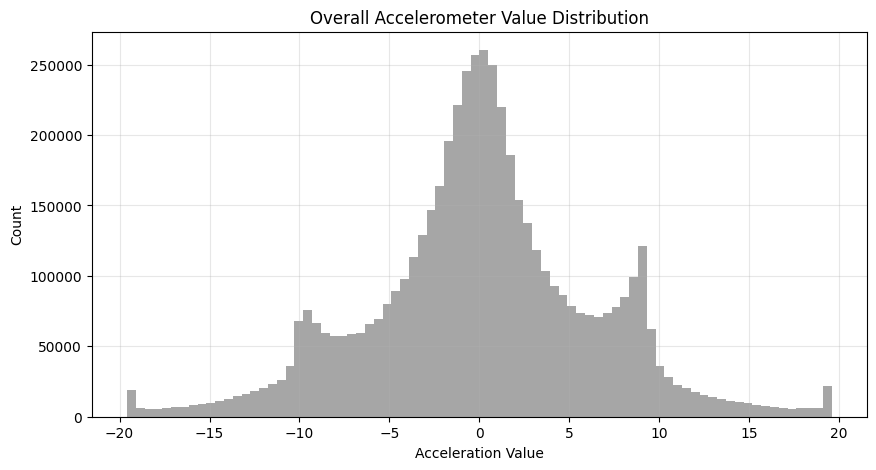

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(X_all.flatten(), bins=80, color='gray', alpha=0.7)
plt.title("Overall Accelerometer Value Distribution")
plt.xlabel("Acceleration Value")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

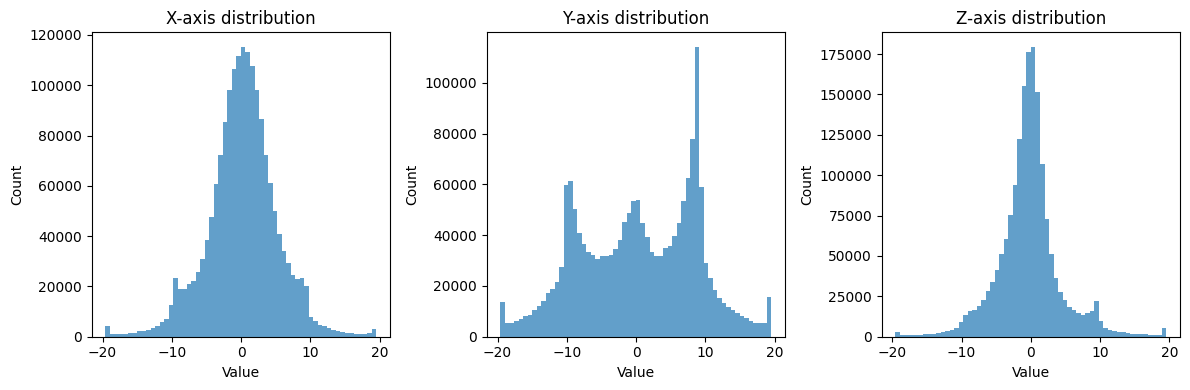

In [36]:
plt.figure(figsize=(12,4))

for i, axis in enumerate(["X", "Y", "Z"]):
    plt.subplot(1,3,i+1)
    plt.hist(X_all[:,:,i].flatten(), bins=60, alpha=0.7)
    plt.title(f"{axis}-axis distribution")
    plt.xlabel("Value")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

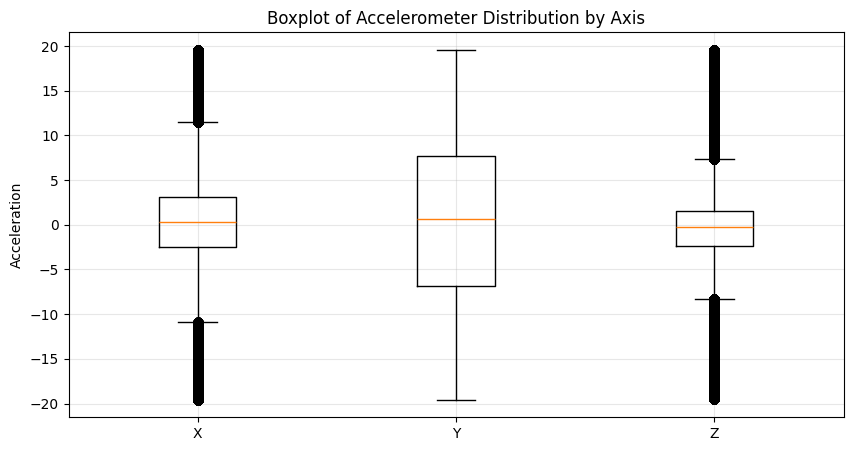

In [38]:
plt.figure(figsize=(10,5))
plt.boxplot([
    X_all[:,:,0].flatten(),
    X_all[:,:,1].flatten(),
    X_all[:,:,2].flatten(),
], tick_labels=["X", "Y", "Z"])

plt.title("Boxplot of Accelerometer Distribution by Axis")
plt.ylabel("Acceleration")
plt.grid(alpha=0.3)
plt.show()

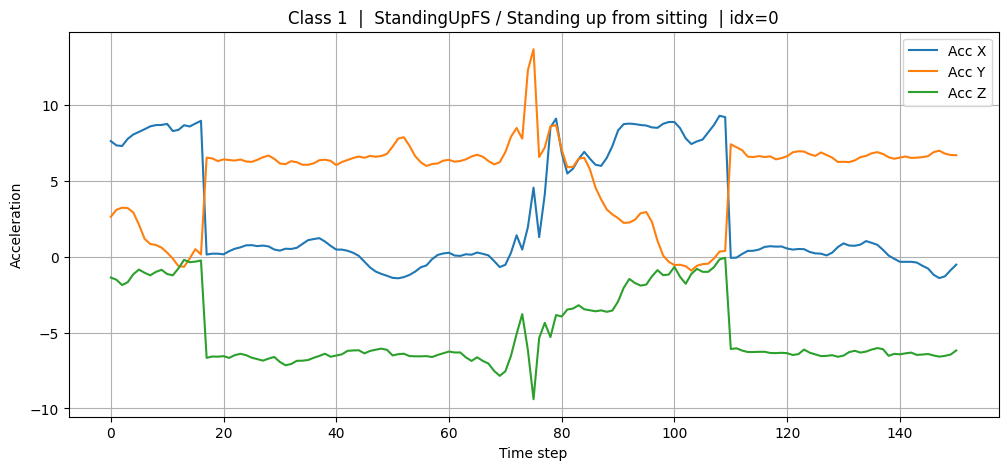

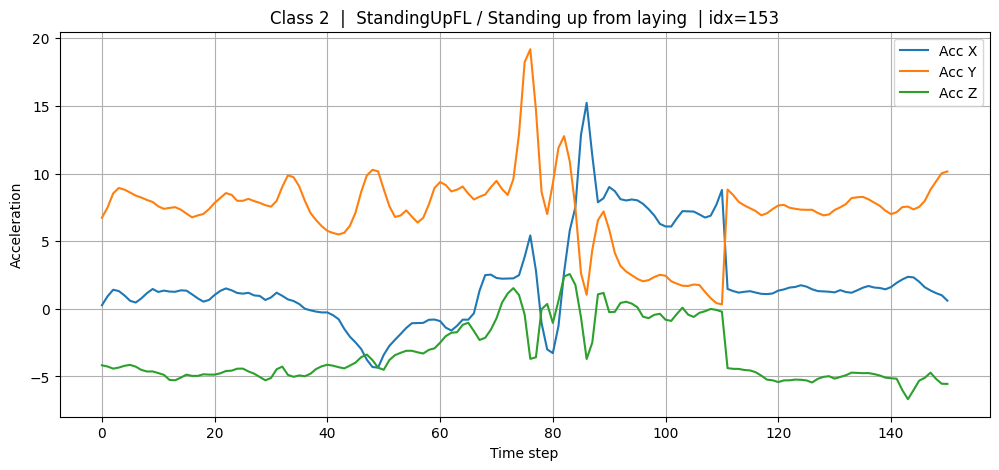

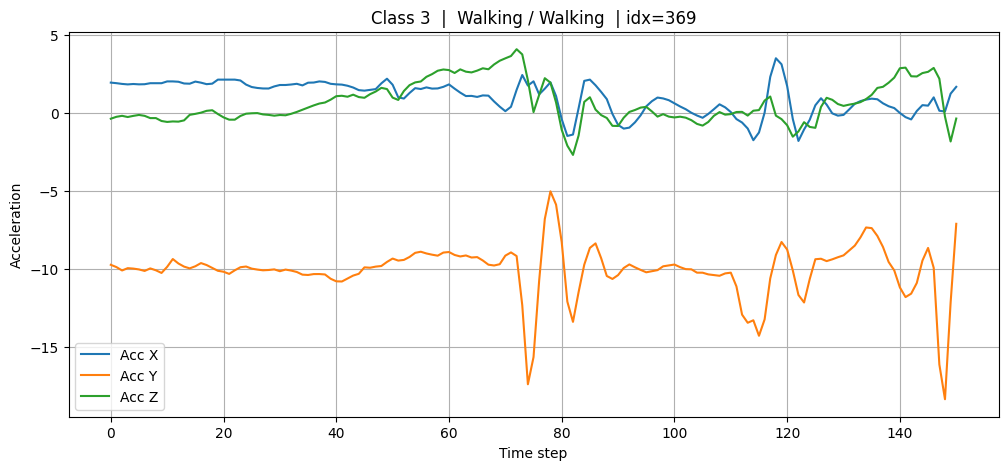

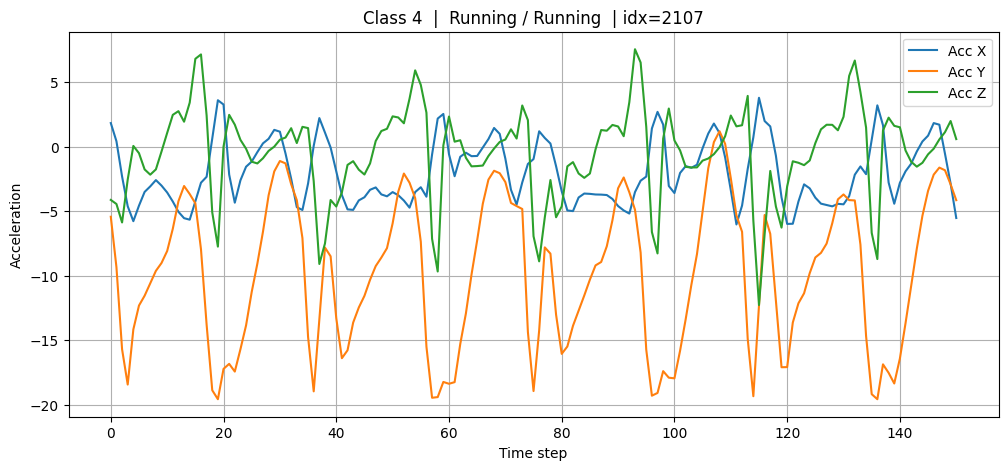

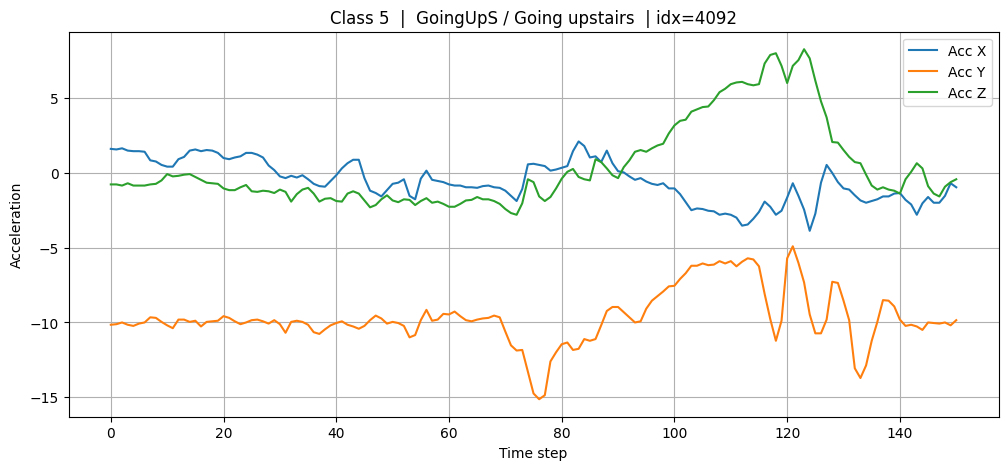

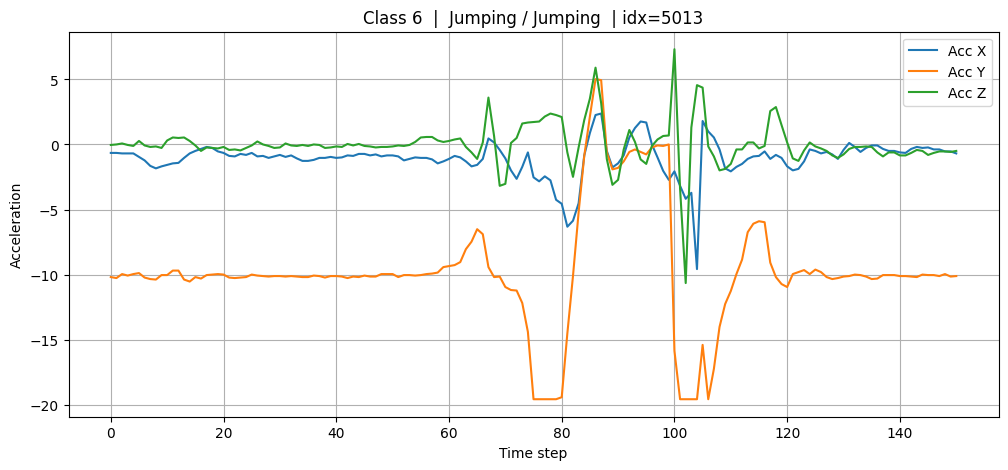

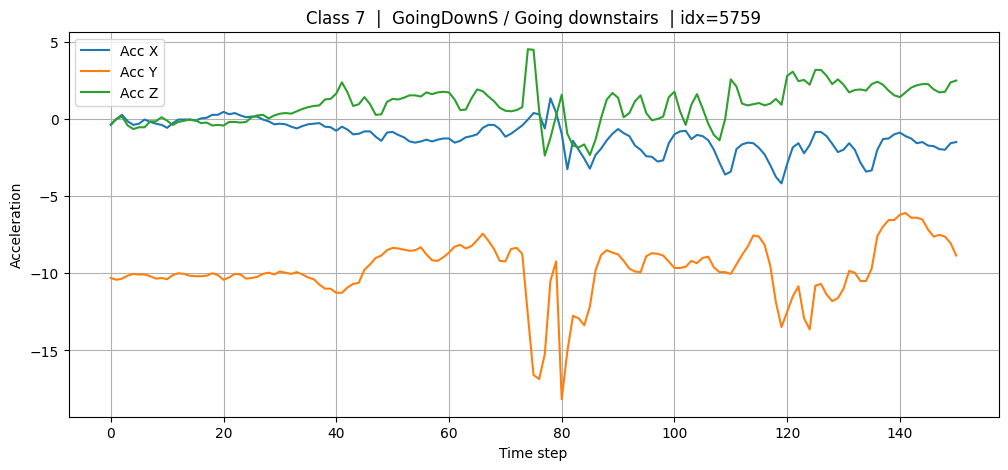

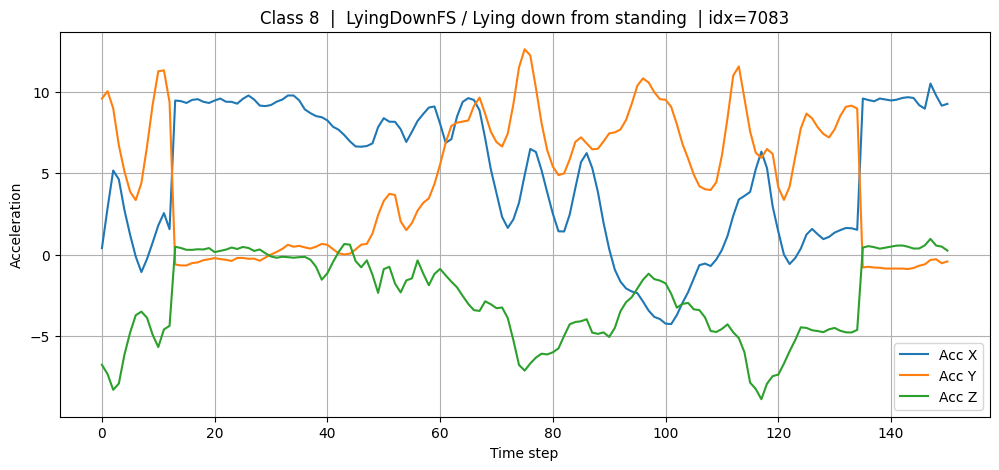

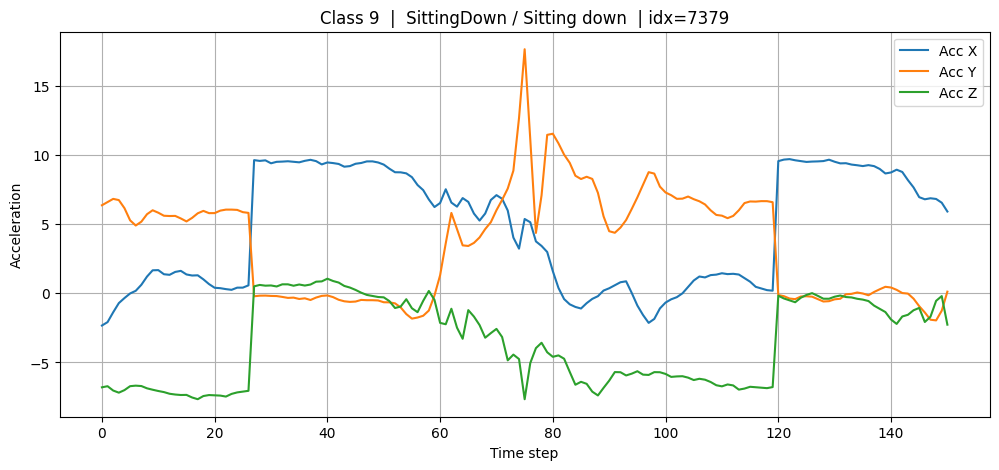

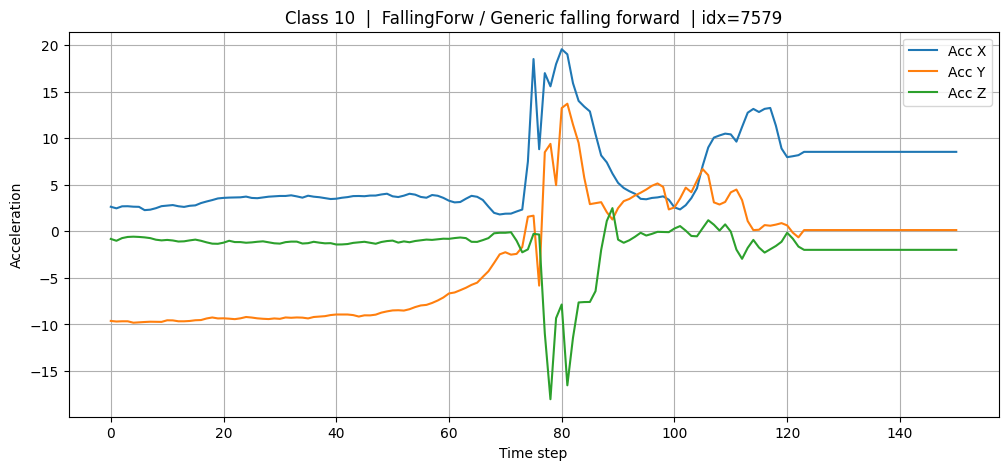

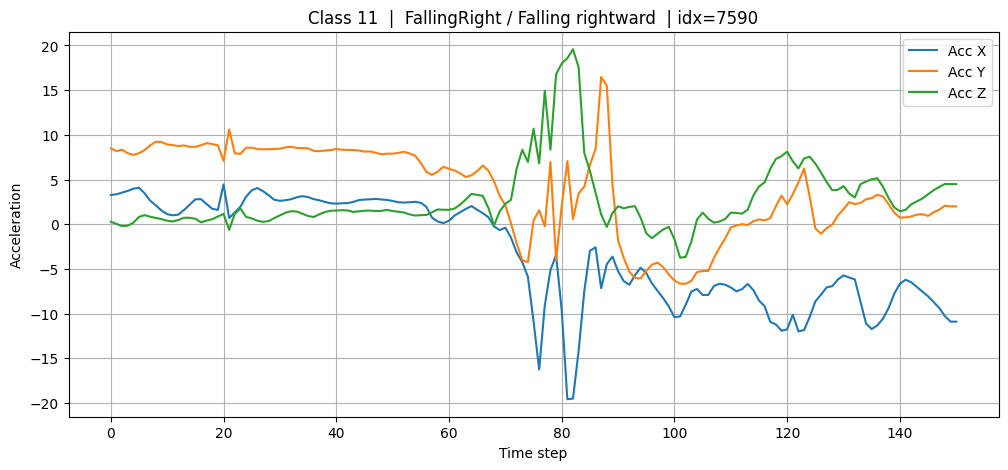

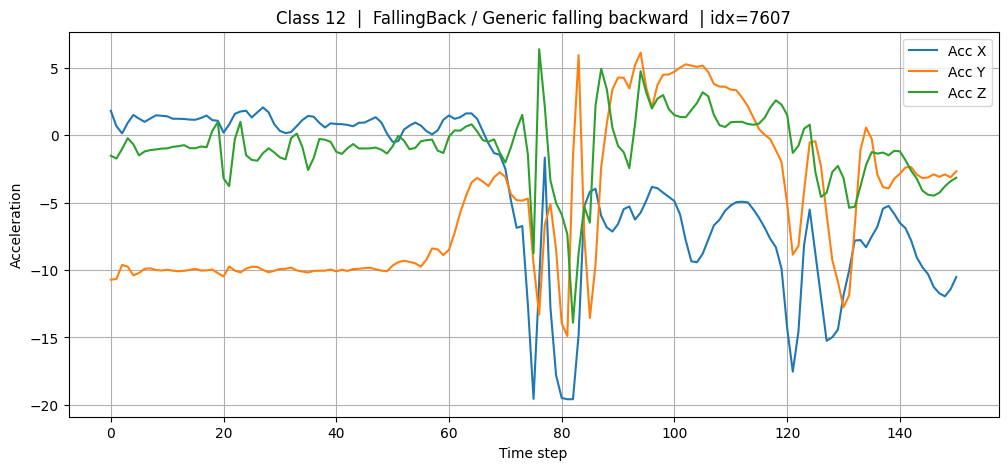

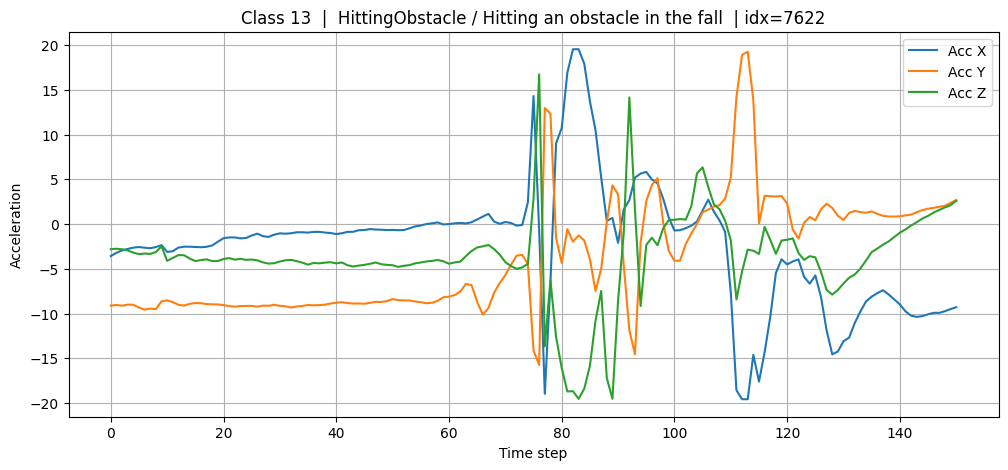

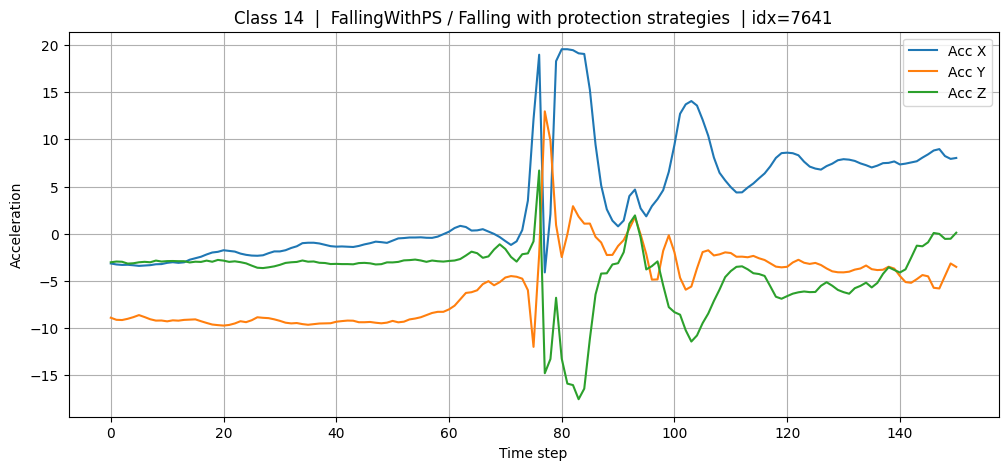

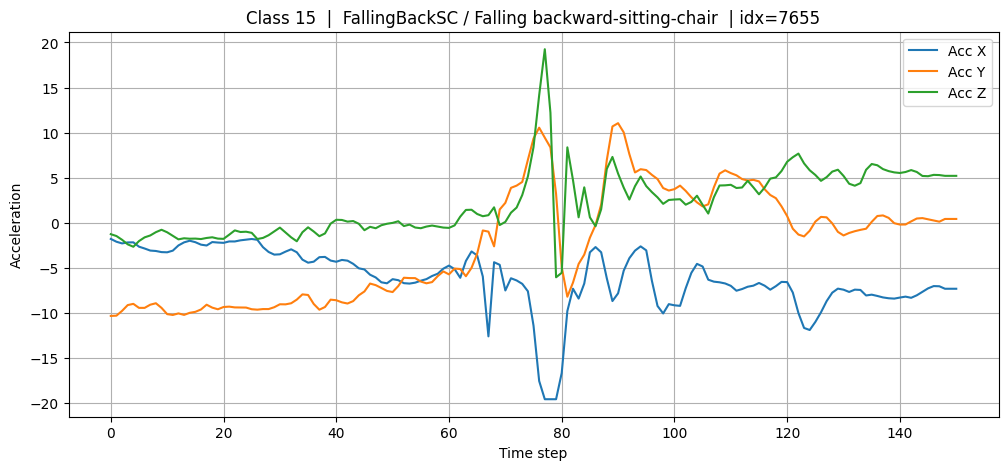

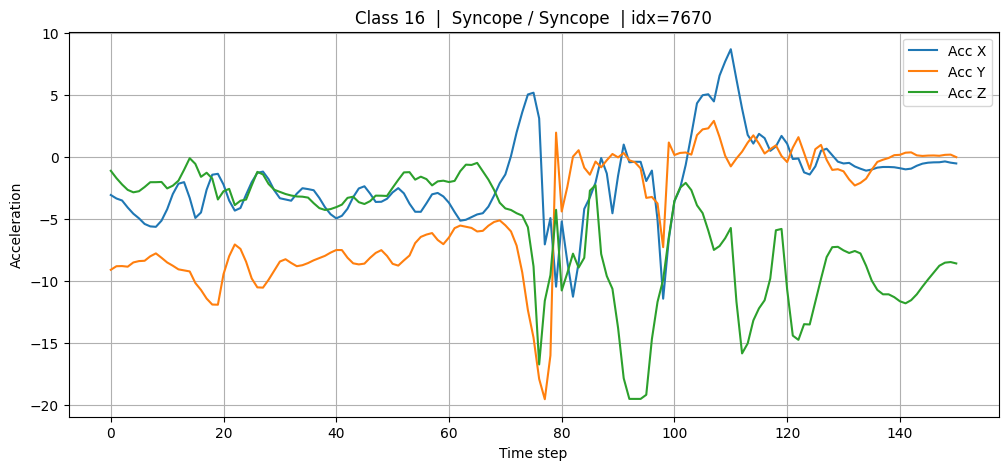

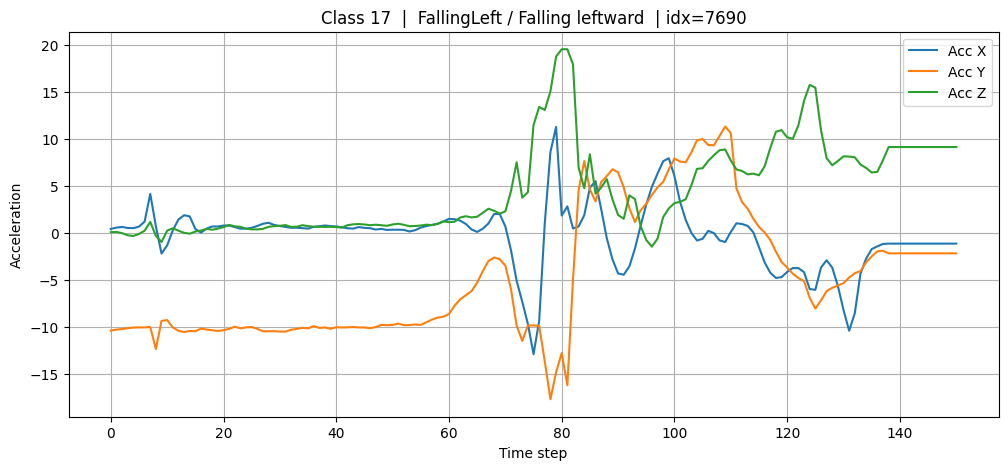

In [25]:
unique_classes = np.unique(y_all)   # 예: [0~16]

for cls in unique_classes:
    # 클래스에 해당하는 첫 번째 샘플 인덱스
    idx = np.where(y_all == cls)[0][0]
    x = X_all[idx]

    # ---- 클래스 이름 추출 ----
    # y_all이 0~16인지 / 1~17인지 자동 판별해서 index 보정
    name_idx = cls - 1

    # acc_names의 문자열은 array(['Walking'], dtype='<U7') 같은 형태라 [0] 필요
    long_name  = acc_names[0][name_idx][0]   # 예: 'Standing up from sitting'
    short_name = acc_names[1][name_idx][0]   # 예: 'StandingUpFS'

    # ---- Plot 시각화 ----
    plt.figure(figsize=(12,5))
    plt.plot(x[:,0], label='Acc X')
    plt.plot(x[:,1], label='Acc Y')
    plt.plot(x[:,2], label='Acc Z')

    plt.title(f"Class {cls}  |  {short_name} / {long_name}  | idx={idx}")
    plt.xlabel("Time step")
    plt.ylabel("Acceleration")
    plt.legend()
    plt.grid()
    plt.show()

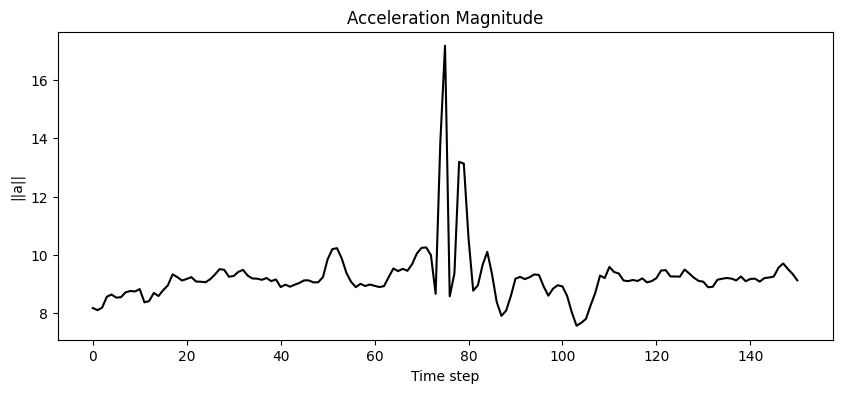

In [10]:
mag = np.sqrt(np.sum(x**2, axis=1))

plt.figure(figsize=(10,4))
plt.plot(mag, color='black')
plt.title("Acceleration Magnitude")
plt.xlabel("Time step")
plt.ylabel("||a||")
plt.show()

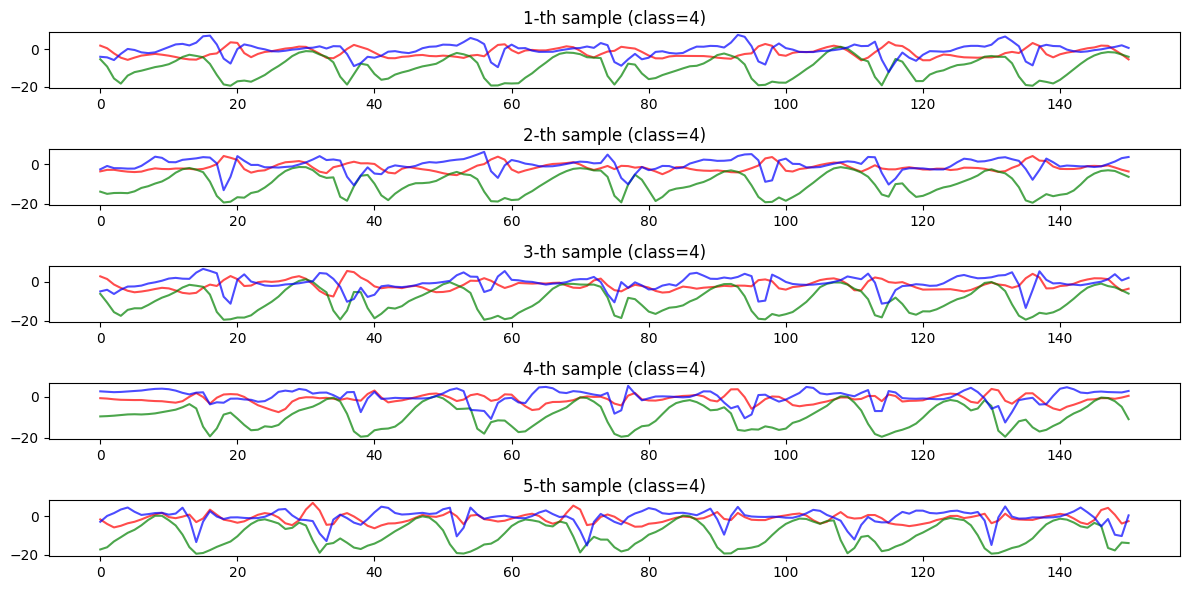

In [15]:
target_class = 4
idxs = np.where(y_all == target_class)[0][:5]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(idxs):
    plt.subplot(5,1,i+1)
    plt.plot(X_all[idx][:,0], color='r', alpha=0.7)
    plt.plot(X_all[idx][:,1], color='g', alpha=0.7)
    plt.plot(X_all[idx][:,2], color='b', alpha=0.7)
    plt.title(f"{i+1}-th sample (class={target_class})")
    plt.tight_layout()
plt.show()

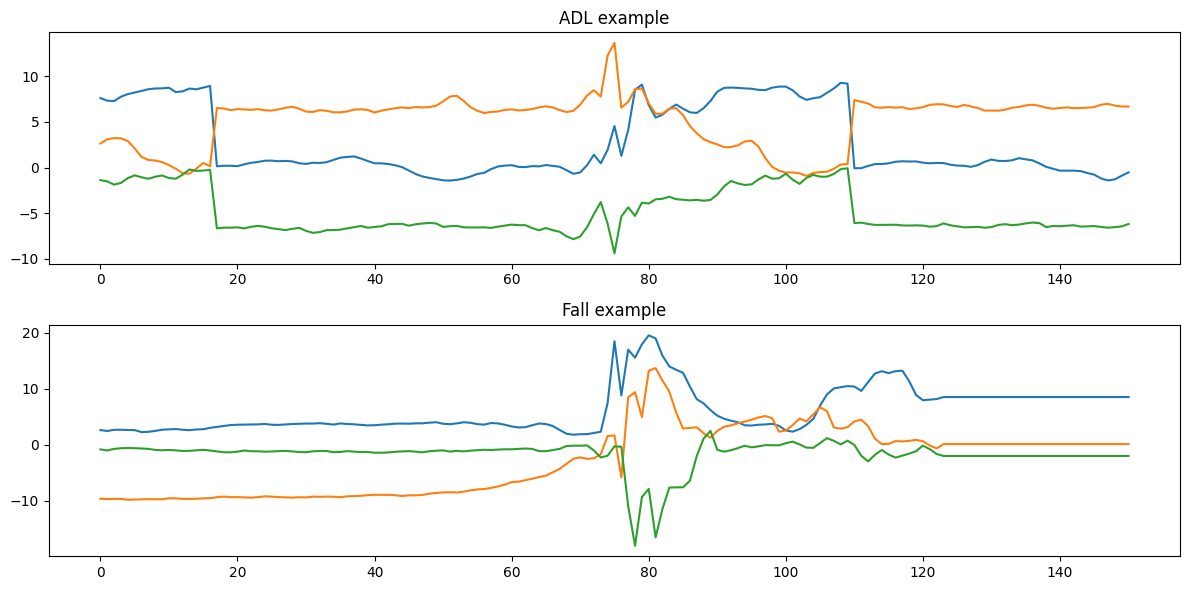

In [16]:
adl_idx = np.where((y_all <= 9))[0][0]      # ADL sample
fall_idx = np.where((y_all > 9))[0][0]      # Fall sample

fig, ax = plt.subplots(2, 1, figsize=(12,6))

ax[0].plot(X_all[adl_idx])
ax[0].set_title("ADL example")

ax[1].plot(X_all[fall_idx])
ax[1].set_title("Fall example")

plt.tight_layout()
plt.show()


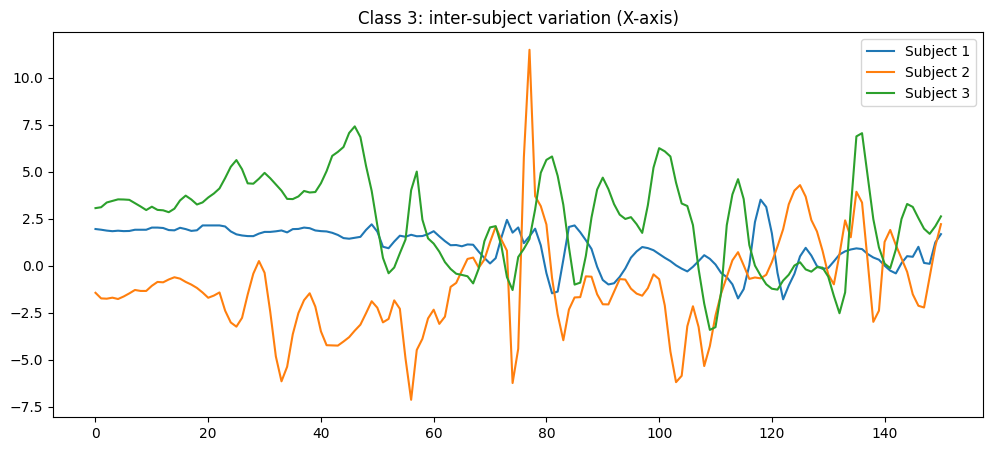

In [17]:
cls = 3
cls_idxs = np.where(y_all == cls)[0]

# 서로 다른 subject 3명 선택
sub_ids = np.unique(subjects[cls_idxs])[:3]

plt.figure(figsize=(12,5))
for i, sid in enumerate(sub_ids):
    idx = cls_idxs[np.where(subjects[cls_idxs] == sid)[0][0]]
    plt.plot(X_all[idx][:,0], label=f"Subject {sid}")

plt.title(f"Class {cls}: inter-subject variation (X-axis)")
plt.legend()
plt.show()

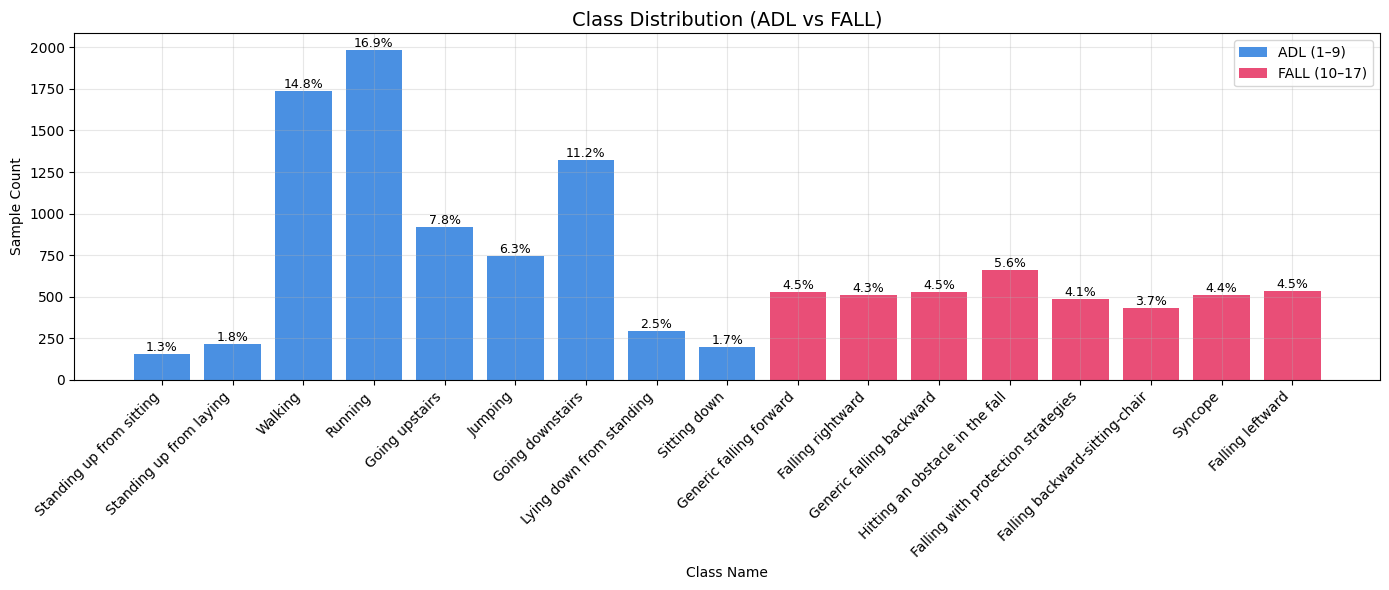

Class 1 (Standing up from sitting) → 153 samples (1.30%)
Class 2 (Standing up from laying) → 216 samples (1.84%)
Class 3 (Walking) → 1738 samples (14.77%)
Class 4 (Running) → 1985 samples (16.86%)
Class 5 (Going upstairs) → 921 samples (7.82%)
Class 6 (Jumping) → 746 samples (6.34%)
Class 7 (Going downstairs) → 1324 samples (11.25%)
Class 8 (Lying down from standing) → 296 samples (2.51%)
Class 9 (Sitting down) → 200 samples (1.70%)
Class 10 (Generic falling forward) → 529 samples (4.49%)
Class 11 (Falling rightward) → 511 samples (4.34%)
Class 12 (Generic falling backward) → 526 samples (4.47%)
Class 13 (Hitting an obstacle in the fall) → 661 samples (5.62%)
Class 14 (Falling with protection strategies) → 484 samples (4.11%)
Class 15 (Falling backward-sitting-chair) → 434 samples (3.69%)
Class 16 (Syncope) → 513 samples (4.36%)
Class 17 (Falling leftward) → 534 samples (4.54%)


In [47]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_all, return_counts=True)
total = counts.sum()

# long names (0~16)
class_names = [acc_names[0][i][0] for i in range(17)]

# ADL = 1~9, FALL = 10~17
colors = ["#4a90e2" if cls <= 9 else "#e94e77" for cls in unique]

plt.figure(figsize=(14,6))
bars = plt.bar(unique, counts, color=colors)

# x축 라벨: 클래스 이름
xtick_labels = [class_names[cls - 1] for cls in unique]  # 1-based
plt.xticks(ticks=unique, labels=xtick_labels, rotation=45, ha='right')

plt.title("Class Distribution (ADL vs FALL)", fontsize=14)
plt.xlabel("Class Name")
plt.ylabel("Sample Count")
plt.grid(alpha=0.3)

# 막대 위 퍼센트
for cls, cnt, bar in zip(unique, counts, bars):
    percent = (cnt / total) * 100
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{percent:.1f}%",
        ha='center', va='bottom', fontsize=9
    )

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#4a90e2", label="ADL (1–9)"),
    Patch(facecolor="#e94e77", label="FALL (10–17)")
]
plt.legend(handles=legend_elements, loc="upper right")

plt.tight_layout()
plt.show()

# 여기서도 u-1로 인덱싱
for u, c in zip(unique, counts):
    idx = u - 1
    print(f"Class {u} ({class_names[idx]}) → {c} samples ({c/total*100:.2f}%)")


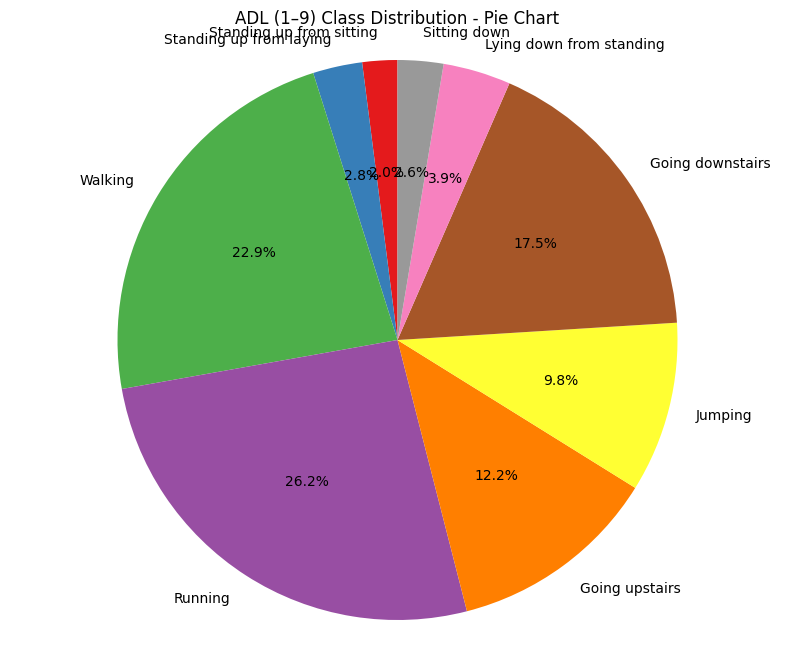

Class 1 (Standing up from sitting) → 153 samples (2.02%)
Class 2 (Standing up from laying) → 216 samples (2.85%)
Class 3 (Walking) → 1738 samples (22.93%)
Class 4 (Running) → 1985 samples (26.19%)
Class 5 (Going upstairs) → 921 samples (12.15%)
Class 6 (Jumping) → 746 samples (9.84%)
Class 7 (Going downstairs) → 1324 samples (17.47%)
Class 8 (Lying down from standing) → 296 samples (3.91%)
Class 9 (Sitting down) → 200 samples (2.64%)


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# --- ADL 범위 설정 ---
adl_classes = np.arange(1, 10)   # 1~9

# ADL에 해당하는 index만 뽑기
adl_mask = np.isin(y_all, adl_classes)

y_adl = y_all[adl_mask]

# 클래스별 샘플 수 세기
unique_adl, counts_adl = np.unique(y_adl, return_counts=True)

# ADL 이름 리스트 (1-based → index = cls-1)
adl_names = [acc_names[0][cls-1][0] for cls in unique_adl]

# Pie Chart 색상 팔레트 (원하는 스타일)
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_adl)))

plt.figure(figsize=(10, 8))
plt.pie(
    counts_adl,
    labels=adl_names,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("ADL (1–9) Class Distribution - Pie Chart")
plt.axis('equal')  # 원형 유지
plt.show()

# 콘솔에서도 출력
for cls, cnt in zip(unique_adl, counts_adl):
    print(f"Class {cls} ({acc_names[0][cls-1][0]}) → {cnt} samples ({cnt / counts_adl.sum() * 100:.2f}%)")


`adl_data, adl_labels`와 같은 분포인지 확인하기

In [50]:
adl_data_file = np.load(f"{base_dir}/adl_data.npy")
adl_labels_file = np.load(f"{base_dir}/adl_labels.npy")
y_adl_file = adl_labels_file[:, 0].astype(int)

In [51]:
print("ADL 파일 라벨 범위:", y_adl_file.min(), "→", y_adl_file.max())

ADL 파일 라벨 범위: 1 → 9


In [55]:
y_adl_file

array([1, 1, 1, ..., 9, 9, 9])

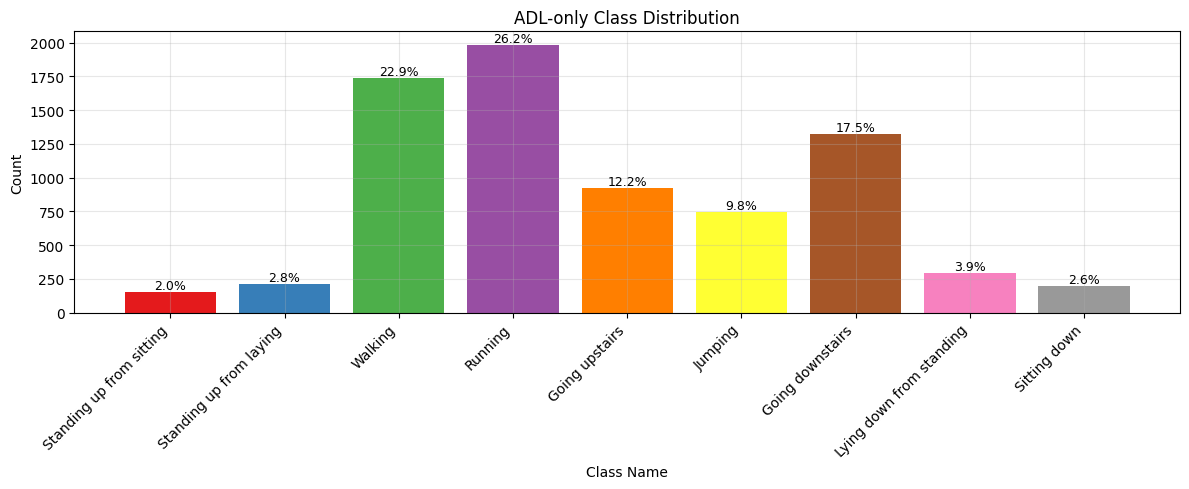

Class 1 (Standing up from sitting) → 153 samples (2.02%)
Class 2 (Standing up from laying) → 216 samples (2.85%)
Class 3 (Walking) → 1738 samples (22.93%)
Class 4 (Running) → 1985 samples (26.19%)
Class 5 (Going upstairs) → 921 samples (12.15%)
Class 6 (Jumping) → 746 samples (9.84%)
Class 7 (Going downstairs) → 1324 samples (17.47%)
Class 8 (Lying down from standing) → 296 samples (3.91%)
Class 9 (Sitting down) → 200 samples (2.64%)


In [54]:
# 클래스 분포 계산
unique, counts = np.unique(y_adl, return_counts=True)
total = counts.sum()

# 클래스 이름 매핑 (acc_names는 0-based)
adl_names = [acc_names[0][cls-1][0] for cls in unique]

# 색상 팔레트
colors = plt.cm.Set1(np.linspace(0, 1, len(unique)))

# --- Bar Plot ---
plt.figure(figsize=(12,5))
bars = plt.bar(unique, counts, color=colors)

plt.xticks(ticks=unique, labels=adl_names, rotation=45, ha='right')
plt.title("ADL-only Class Distribution")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.grid(alpha=0.3)

# 퍼센트 표시
for cls, cnt, bar in zip(unique, counts, bars):
    percent = cnt / total * 100
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{percent:.1f}%",
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()

# --- Console 출력 ---
for cls, cnt in zip(unique, counts):
    print(f"Class {cls} ({acc_names[0][cls-1][0]}) → {cnt} samples ({cnt/total*100:.2f}%)")

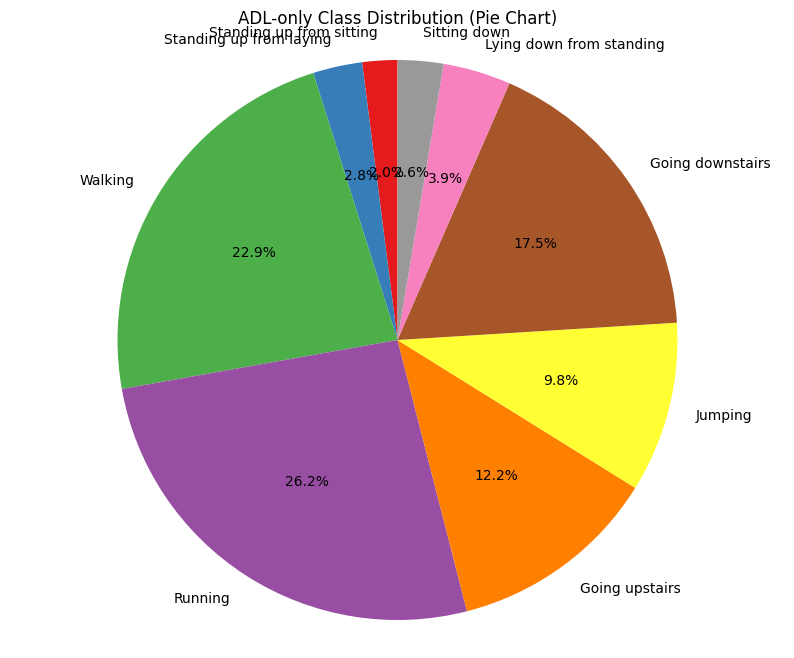

In [56]:
plt.figure(figsize=(10, 8))
plt.pie(
    counts,
    labels=adl_names,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("ADL-only Class Distribution (Pie Chart)")
plt.axis('equal')  # 원형 유지
plt.show()

X_adl shape: (7579, 151, 3)
y_adl range: 1 → 9


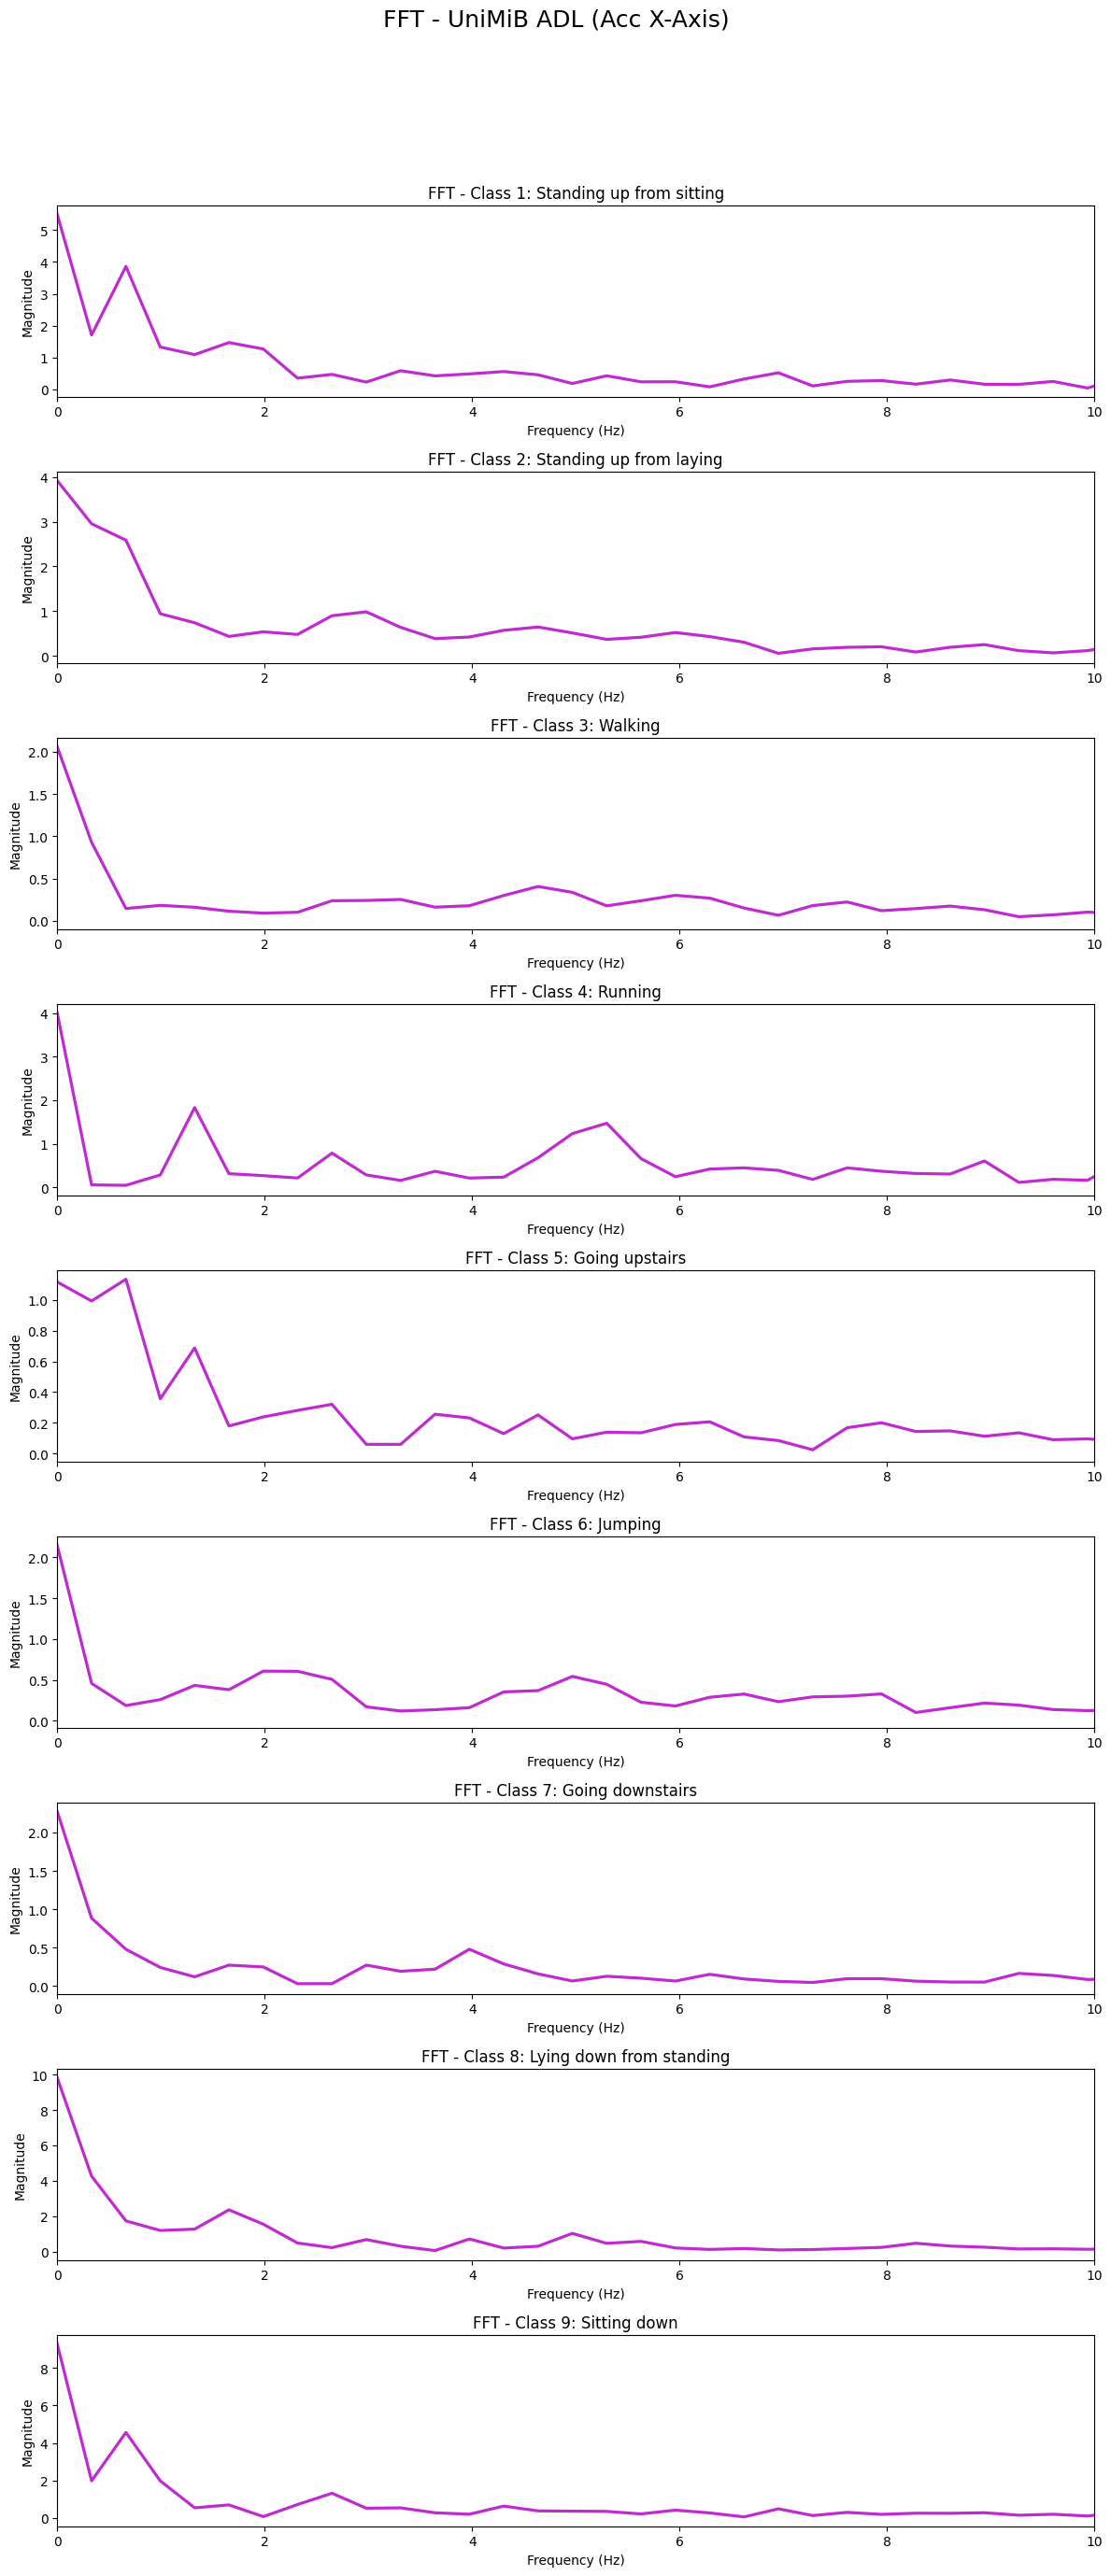

In [59]:
from numpy.fft import fft, fftfreq

N_TIME = 151
X_adl = adl_data.reshape(-1, N_TIME, 3, order='F')   # (7579, 151, 3)

print("X_adl shape:", X_adl.shape)
print("y_adl range:", y_adl.min(), "→", y_adl.max())

# ADL 클래스 목록 (1~9) & 이름 매핑
adl_classes = np.arange(1, 10)  # 1~9
activity_names = [acc_names[0][cls - 1][0] for cls in adl_classes]

# 각 클래스별 대표 샘플 index 뽑기 (첫 번째 것 하나씩)
activity_indices = {}
for cls in adl_classes:
    idx = np.where(y_adl == cls)[0][0]
    activity_indices[cls] = idx

# FFT 설정
SAMPLING_RATE = 50      # UniMiB도 50Hz
N = N_TIME              # 윈도우 길이 151 전체 사용

# 주파수 축 (0 ~ 25Hz 까지)
xf = fftfreq(N, 1 / SAMPLING_RATE)[:N // 2]

fig, axes = plt.subplots(nrows=len(adl_classes), ncols=1, figsize=(12, 3 * len(adl_classes)))
fig.suptitle('FFT - UniMiB ADL (Acc X-Axis)', fontsize=18, y=1.02)

for i, cls in enumerate(adl_classes):
    ax = axes[i]

    sample_idx = activity_indices[cls]
    signal = X_adl[sample_idx, :, 0]   # X축 가속도 (채널 0)

    # FFT 수행
    yf = fft(signal)
    magnitude = 2.0 / N * np.abs(yf[0:N // 2])

    # 플롯
    ax.plot(xf, magnitude, '#c02ad1', linewidth=2.3)
    ax.set_title(f'FFT - Class {cls}: {activity_names[i]}', fontsize=12)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Magnitude')
    ax.set_xlim(0, 10)     # 저주파 영역만 보고 싶으면 (0~10Hz)
    # ax.set_ylim(0, 0.6)  # 필요하면 Y축 고정도 가능

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
